In [12]:
import cv2
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [13]:
from PIL import Image

IMAGE_DIR = "../fashion_images/dataset_clean"

images = []
image_paths = []

# iterate to call images data
for root, _, files in os.walk(IMAGE_DIR):
    for filename in files:
        if filename.lower().endswith(".jpg"):
            path = os.path.join(root, filename)
            image = Image.open(path).convert("RGB")
            images.append(image)
            image_paths.append(path)
    
print(f"Loaded {len(images)} JPG Images")

Loaded 8625 JPG Images


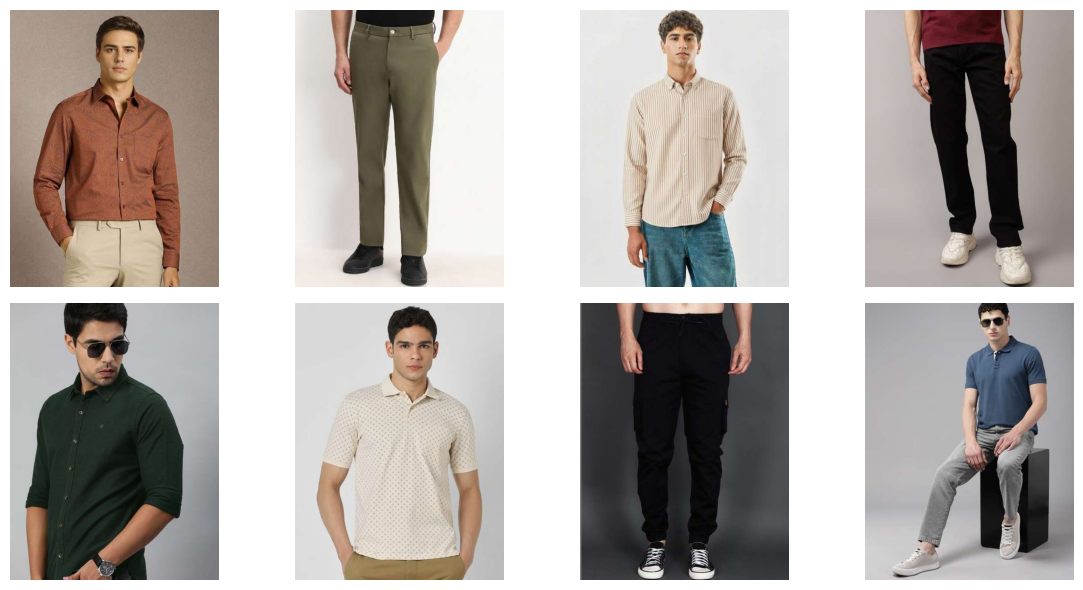

In [14]:
# Show random images

import random
import matplotlib.pyplot as plt

def show_random_images(images, n=8, cols=4, figsize=(12, 6)):
    n = min(n, len(images))
    selected = random.sample(images, n)

    rows = (n + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, img in enumerate(selected):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Usage
show_random_images(images, n=8)

# Tensorflow deep learning model
# Purpose project:
### **Extracting images features to model which are integrated to business problem**
### * **enabling robust modeling of user preferences.**
### * **recommendation algorithms have progressively evolved from linear models to deep neural networks**
### * **multimodal deep learning framework that integrates visual, textual, and price features for business insight**
### * **Try to match outfit features top and bottom wearing (Optional task)**

In [15]:
# Load dataset and metadata
def load_file(csv_path):
    df = pd.read_csv(csv_path)
    return df

pd.set_option('display.max_colwidth', None)
df =load_file("../data/fashion_matching_results.csv")
df_metadata = load_file("../data/fashion_image_metadata.csv")

# Features data matching

In [16]:
df

,item_id,category,subcategory,sleeve_type,season,fabric,occasion,formality_level,size_range,brand,view_count,click_count,purchase_count,length_cm,price,stocks,item_id_str,idx_within_subcat,image_path
0,TNC_000001,bottoms,men_cargos,long,winter,polyester,casual,high,S,Tommy Hilfiger,93,192,4,97,262476,35,TNC_000001,0,../fashion_images/dataset_clean/men_cargos/img_0969.jpg
1,TNC_000002,tops,formal_shirts,long,winter,linen,party,medium,S,HnM,2941,84,5,77,266987,182,TNC_000002,0,../fashion_images/dataset_clean/formal_shirts/img_0969.jpg
2,TNC_000003,tops,formal_shirts,long,winter,denim,party,high,XL,HnM,401,434,35,71,286065,32,TNC_000003,1,../fashion_images/dataset_clean/formal_shirts/img_0955.jpg
3,TNC_000004,tops,printed_tshirts,short,all-season,linen,office,low,XXL,Tommy Hilfiger,318,85,101,70,153376,149,TNC_000004,0,../fashion_images/dataset_clean/printed_tshirts/img_0969.jpg
4,TNC_000005,tops,formal_shirts,long,all-season,polyester,casual,low,L,ZARA,857,153,67,69,323155,43,TNC_000005,2,../fashion_images/dataset_clean/formal_shirts/img_0799.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,TNC_1099996,tops,solid_tshirts,short,summer,polyester,party,medium,M,HnM,2924,183,2,73,140786,163,TNC_1099996,109772,../fashion_images/dataset_clean/solid_tshirts/img_0492.jpg
1099996,TNC_1099997,bottoms,formal_pants,long,summer,denim,party,high,XXL,Polo,2362,94,32,95,353863,198,TNC_1099997,183895,../fashion_images/dataset_clean/formal_pants/img_0123.jpg
1099997,TNC_1099998,bottoms,men_cargos,long,winter,fleece,casual,low,M,Adidas,617,147,39,97,299627,78,TNC_1099998,183289,../fashion_images/dataset_clean/men_cargos/img_0415.jpg
1099998,TNC_1099999,tops,solid_tshirts,short,summer,cotton,office,low,XXL,Tommy Hilfiger,326,0,25,71,153123,172,TNC_1099999,109773,../fashion_images/dataset_clean/solid_tshirts/img_0486.jpg


# Metadata images

In [17]:
df_metadata

,image_path,subcategory,category,item_id,price,brand,sleeve_type,stocks
0,../fashion_images/dataset_clean/men_cargos/img_0969.jpg,men_cargos,bottoms,TNC_000001,262476,Tommy Hilfiger,long,35
1,../fashion_images/dataset_clean/men_cargos/img_0969.jpg,men_cargos,bottoms,TNC_007110,273313,ZARA,long,159
2,../fashion_images/dataset_clean/men_cargos/img_0969.jpg,men_cargos,bottoms,TNC_013990,200119,Adidas,long,25
3,../fashion_images/dataset_clean/men_cargos/img_0969.jpg,men_cargos,bottoms,TNC_021026,258288,Adidas,long,166
4,../fashion_images/dataset_clean/men_cargos/img_0969.jpg,men_cargos,bottoms,TNC_027666,339826,Polo,long,64
...,...,...,...,...,...,...,...,...
1099995,../fashion_images/dataset_clean/casual_shirts/img_0970.jpg,casual_shirts,tops,TNC_1051220,277951,HnM,long,179
1099996,../fashion_images/dataset_clean/casual_shirts/img_0970.jpg,casual_shirts,tops,TNC_1062716,276977,Adidas,long,185
1099997,../fashion_images/dataset_clean/casual_shirts/img_0970.jpg,casual_shirts,tops,TNC_1074617,202924,HnM,long,89
1099998,../fashion_images/dataset_clean/casual_shirts/img_0970.jpg,casual_shirts,tops,TNC_1086381,189557,Tommy Hilfiger,long,152


# Command
### Split data into numeric_cols and categorical_cols
### Normalize Numeric Features
### Encode Categorical Features
### Image Loading Pipeline (TF-Native & Scalable)
### Build tf.data.Dataset (MANDATORY)
    Purpose
    • Streaming
    • Shuffling
    • GPU utilization
    • Reliability

### Define Image Encoder (tensorflow.keras, ResNet50)
### Define Metadata Encoder (MLP + Embeddings)
### Joint Embedding Head (CORE MODEL)
### Final Model (Embedding Model)
### Loss Function (WHY THIS WORKS) -> Use self-supervised similarity.
### Train model
### Generate Embeddings (predict use model toward on data)

## Split data

In [19]:
# Define numeric cols
num_cols = [col for col in df.columns if not col in df.select_dtypes(include=['object']).columns]
obj_cols = [col for col in df.columns if col in df.select_dtypes(include=['object']).columns]

In [24]:
df[obj_cols]

,item_id,category,subcategory,sleeve_type,season,fabric,occasion,formality_level,size_range,brand,item_id_str,image_path
0,TNC_000001,bottoms,men_cargos,long,winter,polyester,casual,high,S,Tommy Hilfiger,TNC_000001,../fashion_images/dataset_clean/men_cargos/img_0969.jpg
1,TNC_000002,tops,formal_shirts,long,winter,linen,party,medium,S,HnM,TNC_000002,../fashion_images/dataset_clean/formal_shirts/img_0969.jpg
2,TNC_000003,tops,formal_shirts,long,winter,denim,party,high,XL,HnM,TNC_000003,../fashion_images/dataset_clean/formal_shirts/img_0955.jpg
3,TNC_000004,tops,printed_tshirts,short,all-season,linen,office,low,XXL,Tommy Hilfiger,TNC_000004,../fashion_images/dataset_clean/printed_tshirts/img_0969.jpg
4,TNC_000005,tops,formal_shirts,long,all-season,polyester,casual,low,L,ZARA,TNC_000005,../fashion_images/dataset_clean/formal_shirts/img_0799.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,TNC_1099996,tops,solid_tshirts,short,summer,polyester,party,medium,M,HnM,TNC_1099996,../fashion_images/dataset_clean/solid_tshirts/img_0492.jpg
1099996,TNC_1099997,bottoms,formal_pants,long,summer,denim,party,high,XXL,Polo,TNC_1099997,../fashion_images/dataset_clean/formal_pants/img_0123.jpg
1099997,TNC_1099998,bottoms,men_cargos,long,winter,fleece,casual,low,M,Adidas,TNC_1099998,../fashion_images/dataset_clean/men_cargos/img_0415.jpg
1099998,TNC_1099999,tops,solid_tshirts,short,summer,cotton,office,low,XXL,Tommy Hilfiger,TNC_1099999,../fashion_images/dataset_clean/solid_tshirts/img_0486.jpg


## Normalize Numeric Features

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler